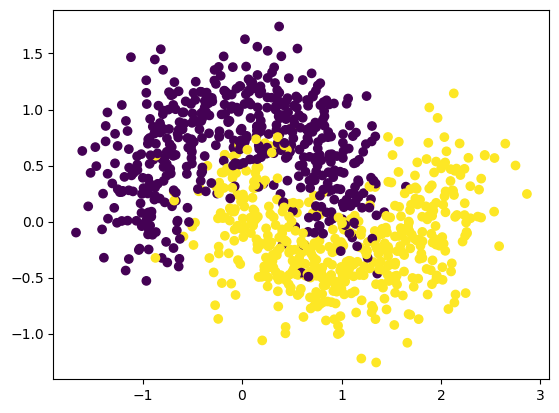

In [42]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
import numpy as np

X, y = make_moons(n_samples = 1000, noise = 0.3, random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [40]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 42)

# -------------------------------------------------------------
# linear kernel
# -------------------------------------------------------------
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# 1. CV로 성능 추정
cv_scores = cross_val_score(pipe_linear, X_train, y_train, cv=5)
print("CV mean:", cv_scores.mean())

# 2. 전체 train으로 학습
pipe_linear.fit(X_train, y_train)

# 3. test 평가
test_score = pipe_linear.score(X_test, y_test)
print("Test accuracy:", test_score)

# -------------------------------------------------------------
# rbf kernel
# -------------------------------------------------------------
pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

# 1. CV로 성능 추정
cv_scores = cross_val_score(pipe_rbf, X_train, y_train, cv=5)
print("CV mean:", cv_scores.mean())

# 2. 전체 train으로 학습
pipe_rbf.fit(X_train, y_train)

# 3. test 평가
test_score = pipe_rbf.score(X_test, y_test)
print("Test accuracy:", test_score)

CV mean: 0.85
Test accuracy: 0.8533333333333334
CV mean: 0.9057142857142857
Test accuracy: 0.9033333333333333


In [41]:
# rbf grid search CV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=100))
])

param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
}

grid_svm = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']

result = result.sort_values(by='mean_test_score', ascending=False)
print(result.head())
print("Best Parameters:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)


    svm__C  svm__gamma  mean_test_score
20     0.1        10.0         0.914286
36    10.0        10.0         0.914286
28     1.0        10.0         0.911429
27     1.0         1.0         0.910000
35    10.0         1.0         0.910000
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 10}
Best CV Score: 0.9142857142857143


In [ ]:
best_C = 0.1
best_gamma = 10

def make_param_grid(C_center, gamma_center,
                    C_range=(0.5, 5), C_steps=7,
                    gamma_range=(0.5, 2), gamma_steps=6):

    C_multipliers = np.linspace(C_range[0], C_range[1], C_steps)
    gamma_multipliers = np.linspace(gamma_range[0], gamma_range[1], gamma_steps)

    param_grid = {
        'svm__C': np.unique(C_center * C_multipliers),
        'svm__gamma': np.unique(gamma_center * gamma_multipliers)
    }

    return param_grid

param_grid_fine = make_param_grid(
    C_center=0.1,
    gamma_center=10
)

{'svm__C': array([0.05 , 0.125, 0.2  , 0.275, 0.35 , 0.425, 0.5  ]),
 'svm__gamma': array([ 5.,  8., 11., 14., 17., 20.])}

In [46]:
# rbf grid search CV
grid_svm_fine = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1
)

grid_svm_fine.fit(X_train, y_train)

result = pd.DataFrame(grid_svm_fine.cv_results_['params'])
result['mean_test_score'] = grid_svm_fine.cv_results_['mean_test_score']

result = result.sort_values(by='mean_test_score', ascending=False)
print(result.head())
print("Best Parameters:", grid_svm_fine.best_params_)
print("Best CV Score:", grid_svm_fine.best_score_)


    svm__C  svm__gamma  mean_test_score
38   0.500        11.0         0.915714
36   0.500         5.0         0.914286
27   0.350        14.0         0.914286
32   0.425        11.0         0.914286
13   0.200         8.0         0.914286
Best Parameters: {'svm__C': 0.5, 'svm__gamma': 11.0}
Best CV Score: 0.9157142857142857


In [47]:
param_grid_fine = make_param_grid(
    C_center=0.5,
    gamma_center=11
)

# rbf grid search CV
grid_svm_fine = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1
)

grid_svm_fine.fit(X_train, y_train)

result = pd.DataFrame(grid_svm_fine.cv_results_['params'])
result['mean_test_score'] = grid_svm_fine.cv_results_['mean_test_score']

result = result.sort_values(by='mean_test_score', ascending=False)
print(result.head())
print("Best Parameters:", grid_svm_fine.best_params_)
print("Best CV Score:", grid_svm_fine.best_score_)

    svm__C  svm__gamma  mean_test_score
19   1.375         8.8         0.914286
7    0.625         8.8         0.914286
33   2.125        15.4         0.912857
27   1.750        15.4         0.912857
3    0.250        15.4         0.912857
Best Parameters: {'svm__C': 0.625, 'svm__gamma': 8.8}
Best CV Score: 0.9142857142857143
